In [6]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy import interp
from scipy.interpolate import UnivariateSpline
from scipy.special import erf
%matplotlib nbagg

In [273]:
def SegFunc(Nt,a_l,a_c,L):
    z = np.linspace(-10,10,2000)
    z1 = [(i * 1*10**-9) for i in z]
    Nx1 = []
    Nx1_1 = []
    for i in z1:
        if 0>i>-L:
            a = Nt*a_l*np.exp(-a_l*-i)
            a_1 = i
            Nx1.append(a)
            Nx1_1.append(a_1)
        elif i<-L:
            b = Nt*a_c*np.exp(-a_l*L)*np.exp(-a_c*(-i-L))
            b_1 = i
            Nx1.append(b)
            Nx1_1.append(b_1)
        elif i<0:
            c = 0
            c_1 = i 
            Nx1.append(c)
            Nx1_1.append(c_1)
    N11 = np.array(Nx1)
    N22 = np.array(Nx1_1)    
    
    return N11,-N22

<IPython.core.display.Javascript object>


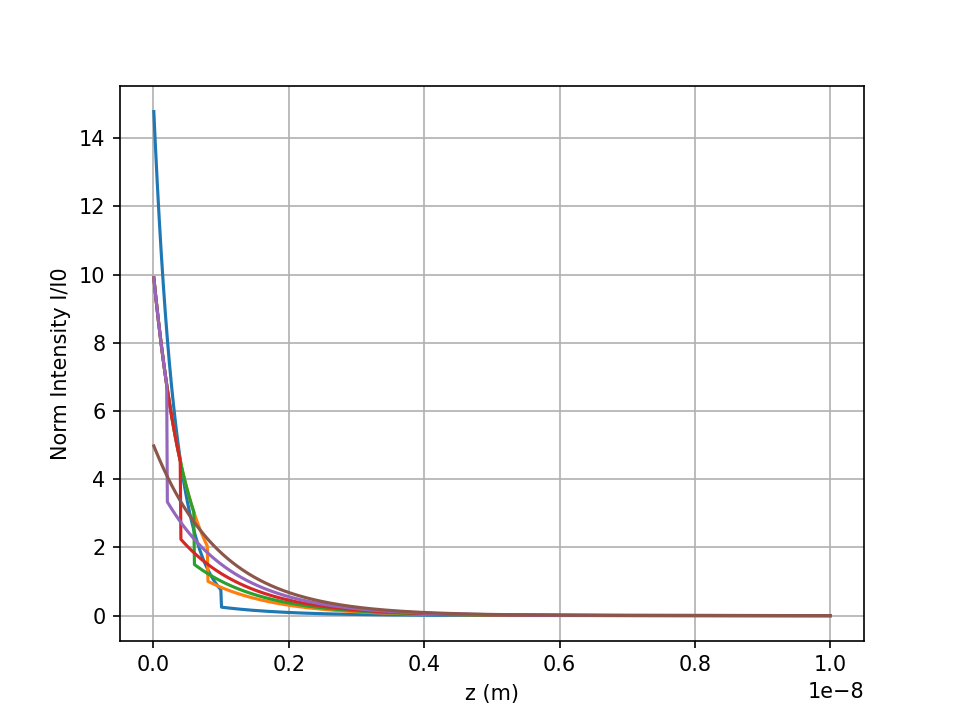

In [274]:
plt.figure()
Y1,X1 = SegFunc(5*10**-9,3*10**9,1*10**9,1*10**-9)
Y2,X2 = SegFunc(5*10**-9,2*10**9,1*10**9,0.8*10**-9)
Y3,X3 = SegFunc(5*10**-9,2*10**9,1*10**9,0.6*10**-9)
Y4,X4 = SegFunc(5*10**-9,2*10**9,1*10**9,0.4*10**-9)
Y5,X5 = SegFunc(5*10**-9,2*10**9,1*10**9,0.2*10**-9)
Y6,X6 = SegFunc(5*10**-9,2*10**9,1*10**9,0*10**-9)
ax = plt.subplot(111)
ax.plot(X1,Y1, label = '1 nm')
ax.plot(X2,Y2, label = '0.8 nm')
ax.plot(X3,Y3, label = '0.6 nm')
ax.plot(X4,Y4, label = '0.4 nm')
ax.plot(X5,Y5, label = '0.2 nm')
ax.plot(X6,Y6, label = '0 nm')
plt.xlabel('z (m)')
plt.ylabel('Norm Intensity I/I0')
ax.legend(prop={'size': 12}) # creates legend 
plt.grid() 

In [275]:

def MRIFunc(w,lam,sig,a_1,a_2,zoff,L): # MRI Function is defined, taking three input values w, lambda and sigma
    z = np.linspace(-5,5,1000)  # creates sequence of evenly 1000 evenly spaced values from -5 to 5
    z1 = [(i * 1*10**-9)-zoff for i in z] # converts all z values in sequence into nanometres 
    g_mri1 = [] # defines an empty matrix for final mri intensity values
    Ns_m = []
    for i in z1: # loops through all the values in z1, inputting them into the analyticl expressino for the MRI
        a = ((1/(2*w))*(1-np.exp(-w/lam))*np.exp(((-i-w)/w)+((sig**2)/(2*w**2)))) # the analytical expression broken down into four parts a,b,c and d
        b = (1 - erf((1/np.sqrt(2))*(((-i-w)/sig)+(sig/w))))
        c = ((1/(2*lam))*np.exp((i/lam)+((sig**2)/(2*lam**2))))
        d = (1 + erf((1/np.sqrt(2))*(((-i-w)/sig)-(sig/lam))))                                                              
        final = (a*b)+(c*d)
        g_mri1.append(final) # the output of the equation is inputted into the empty MRI matrix

        N1,N1x = SegFunc(5*10**21,a_1,a_2,L)#np.exp(a_1*i)*np.exp(a_2*i)
        #N11 = np.array(N1)
        #N22 = np.array(N1x)
    Ns_m.append(N1)
    N2 = np.array(Ns_m)
    Ns111 = N2.reshape((1000,))
    MRI_Ns = np.convolve(g_mri1,Ns111)
    M = np.array(MRI_Ns)
 #   for j in g_mri1:
 #       f = j/np.max(g_mri1)
 #       gn.append(f)
#print(np.shape(g_mri1))
#print(np.shape(Ns111))
#print(np.shape(MRI_Ns))
    return(M)

def NormFunc(MRI_Ns, A):
        MRI_F = (MRI_Ns/A)*1.4195639999999999e+23
        N = np.array(MRI_F)
        return(N)

In [276]:
def MRI_for_fit(z,w,lam,sig,a_1,a_2,zoff,L):
    MRI_array = MRIFunc(w,lam,sig,a_1,a_2,zoff,L)
    MRI_arrayN = NormFunc(MRI_array,np.trapz(MRI_array))
    MRI_output = [MRI_arrayN[int(value)] for value in z]
    return(MRI_output)

<IPython.core.display.Javascript object>


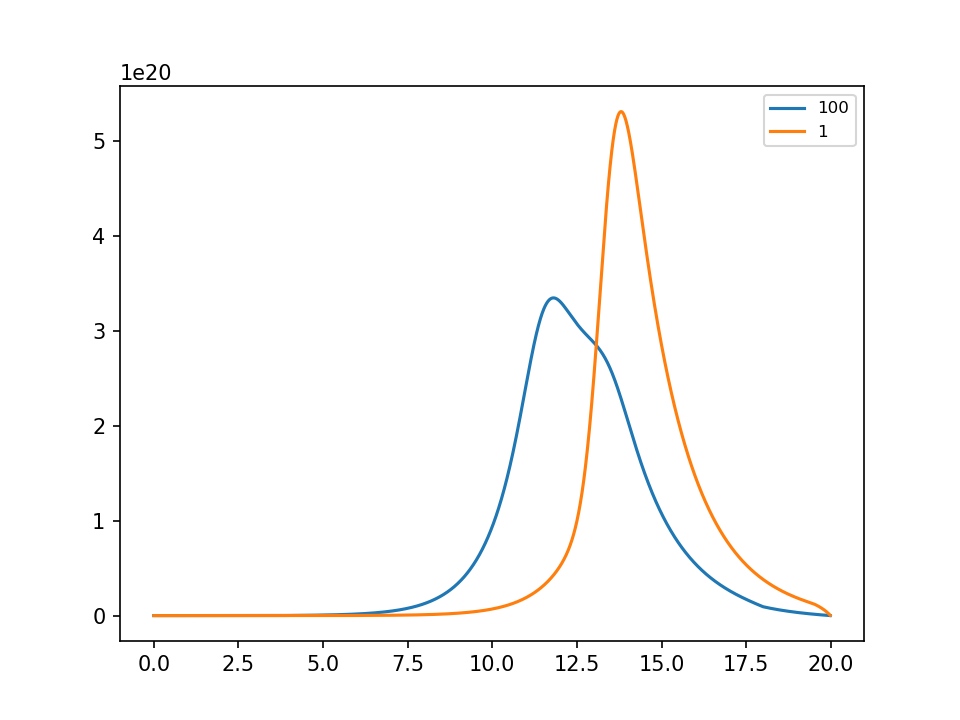

In [279]:
plt.figure()
z2 = np.linspace(0,1998,1999)
x = np.linspace(0,19.98,1999)
ax = plt.subplot(111)
ax.plot(x,MRI_for_fit(np.r_[z2],1.5*10**-9,0.136*10**-9,0.4*10**-9,0.2*10**9,1*10**9,0,2*10**-9),label = '100')#1.58*10**-9,0.136*10**-9,0.4*10**-9,0.3*10**9,2*10**-9
ax.plot(x,MRI_for_fit(np.r_[z2],1.5*10**-9,0.136*10**-9,0.4*10**-9,3*10**9,1*10**9,0,0.5*10**-9),label = '1')
ax.legend(prop={'size': 8})